# Goals

We are going to build a simple CB-IAM, based on the SC-IAM we built in Lab 3.

To do that, we need:
 - A model of emissions
 - Estimates of mitigation costs
 - An optimization step

# Get a new dataset

The dataset comes from the ENGAGE project, an intermodel comparison of DP-IAMs:
https://data.ene.iiasa.ac.at/engage/#/downloads

The full dataset is 95 MB and includes 9 PB-IAMs and 182 scenarios:
https://www.dropbox.com/s/u3drzbpl91r331z/ENGAGE_scenario_data_world_r2.0.csv?dl=0

We are going to use two versions of this data: for baseline characteristics, we will use the "no policy" scenario of one DP-IAM called AIM/CGE which includes a computational general equilibrium model and a sophisticated energy system. For modeling mitigation, we will use all models and scenarios, but only a few output variables.

Download the first file from
https://www.dropbox.com/scl/fi/04y9nuz7jydwq8tbv9080/aimcge-np.csv?rlkey=wy965td792moq76kl1zr178u1&dl=0

In [2]:
input = read.csv("aimcge-np.csv")

In [3]:
input

Model,Scenario,Region,Variable,Unit,X2000,X2001,X2002,X2003,X2004,⋯,X2091,X2092,X2093,X2094,X2095,X2096,X2097,X2098,X2099,X2100
<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AIM/CGE V2.2,EN_NPi2100,World,Agricultural Demand,million t DM/yr,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,5840.6529,NA,NA,NA,NA,5908.8598
AIM/CGE V2.2,EN_NPi2100,World,Agricultural Production|Energy|Crops,million t DM/yr,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,714.2877,NA,NA,NA,NA,764.4235
AIM/CGE V2.2,EN_NPi2100,World,Capacity Additions|Electricity|Biomass,GW/yr,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,11.2781,NA,NA,NA,NA,12.1047
AIM/CGE V2.2,EN_NPi2100,World,Capacity Additions|Electricity|Coal,GW/yr,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,300.2123,NA,NA,NA,NA,360.5276
AIM/CGE V2.2,EN_NPi2100,World,Capacity Additions|Electricity|Gas,GW/yr,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,102.8130,NA,NA,NA,NA,131.9642
AIM/CGE V2.2,EN_NPi2100,World,Capacity Additions|Electricity|Geothermal,GW/yr,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,3.4287,NA,NA,NA,NA,3.6637
AIM/CGE V2.2,EN_NPi2100,World,Capacity Additions|Electricity|Hydro,GW/yr,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,103.8142,NA,NA,NA,NA,104.6357
AIM/CGE V2.2,EN_NPi2100,World,Capacity Additions|Electricity|Nuclear,GW/yr,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,67.1511,NA,NA,NA,NA,81.7342
AIM/CGE V2.2,EN_NPi2100,World,Capacity Additions|Electricity|Oil,GW/yr,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,14.7919,NA,NA,NA,NA,4.6177


In [4]:
library(reshape2)

In [5]:
input2 = melt(input, c('Model', 'Scenario', 'Region', 'Variable', 'Unit'))

In [6]:
input2

Model,Scenario,Region,Variable,Unit,variable,value
<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>
AIM/CGE V2.2,EN_NPi2100,World,Agricultural Demand,million t DM/yr,X2000,NA
AIM/CGE V2.2,EN_NPi2100,World,Agricultural Production|Energy|Crops,million t DM/yr,X2000,NA
AIM/CGE V2.2,EN_NPi2100,World,Capacity Additions|Electricity|Biomass,GW/yr,X2000,NA
AIM/CGE V2.2,EN_NPi2100,World,Capacity Additions|Electricity|Coal,GW/yr,X2000,NA
AIM/CGE V2.2,EN_NPi2100,World,Capacity Additions|Electricity|Gas,GW/yr,X2000,NA
AIM/CGE V2.2,EN_NPi2100,World,Capacity Additions|Electricity|Geothermal,GW/yr,X2000,NA
AIM/CGE V2.2,EN_NPi2100,World,Capacity Additions|Electricity|Hydro,GW/yr,X2000,NA
AIM/CGE V2.2,EN_NPi2100,World,Capacity Additions|Electricity|Nuclear,GW/yr,X2000,NA
AIM/CGE V2.2,EN_NPi2100,World,Capacity Additions|Electricity|Oil,GW/yr,X2000,NA


In [7]:
input2 = subset(input2, !is.na(value))

In [8]:
input2$year = as.numeric(substring(input2$variable, 2, 5))

In [9]:
temp = subset(input2, Variable == 'Diagnostics|MAGICC6|Temperature|Global Mean')

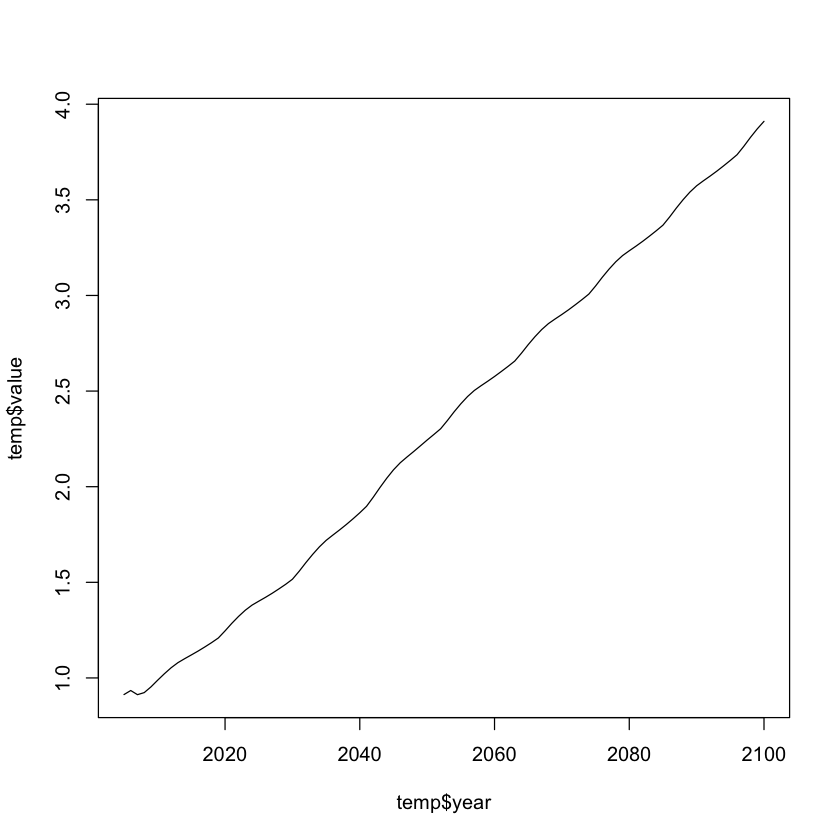

In [10]:
plot(temp$year, temp$value, type='l')

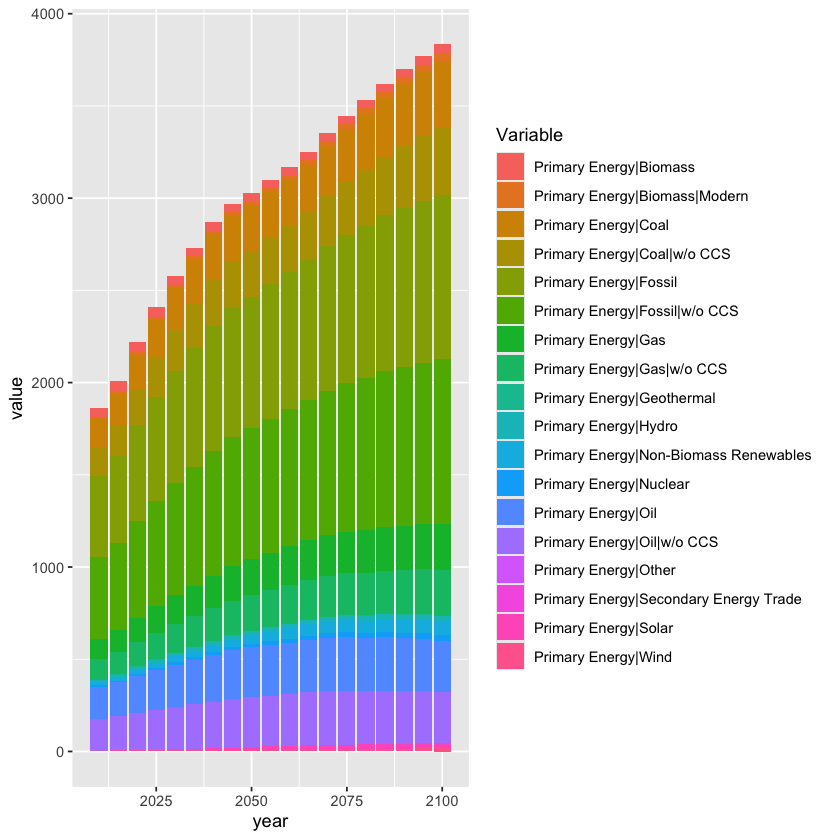

In [11]:
library(ggplot2)
ggplot(input2[grep("Primary Energy\\|", input2$Variable),], aes(year, value, fill=Variable)) + geom_col()

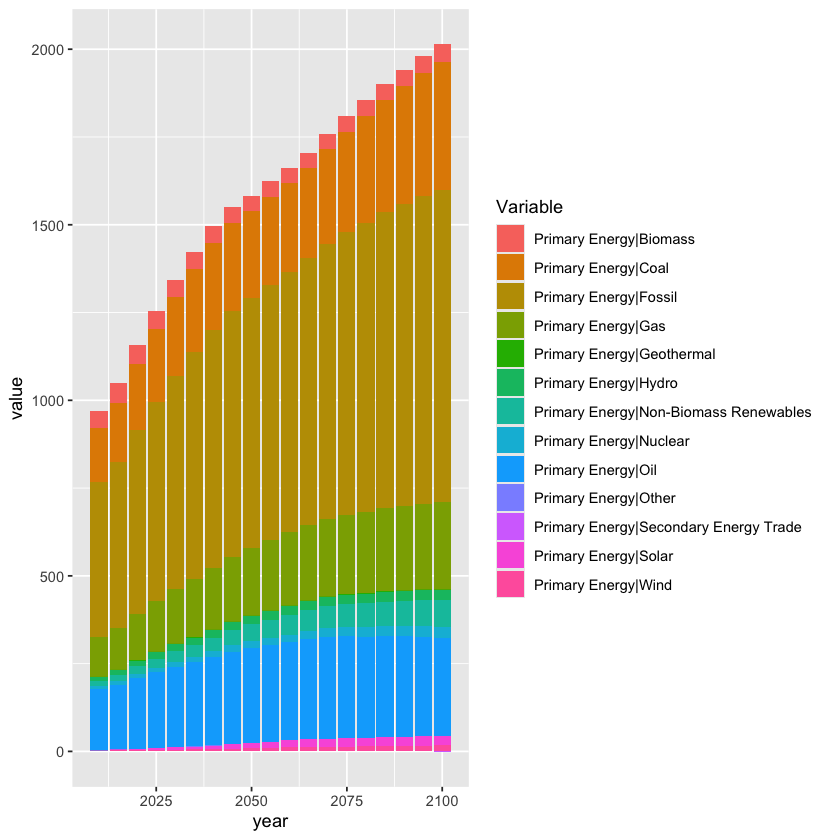

In [12]:
ggplot(input2[grep("Primary Energy\\|[^|]+$", input2$Variable),], aes(year, value, fill=Variable)) + geom_col()

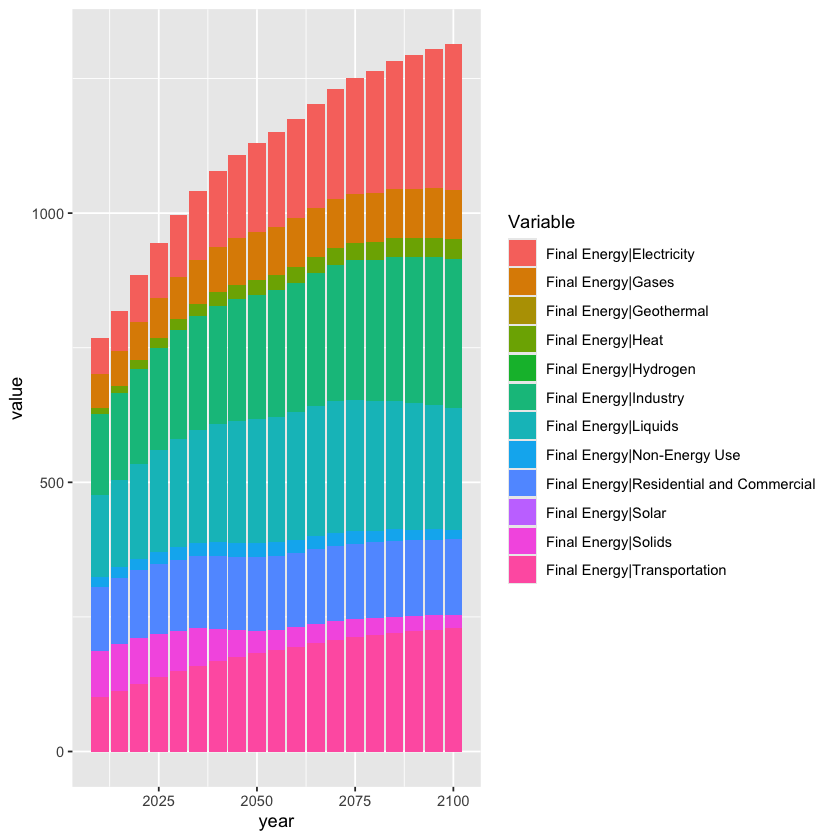

In [13]:
ggplot(input2[grep("Final Energy\\|[^|]+$", input2$Variable),], aes(year, value, fill=Variable)) + geom_col()

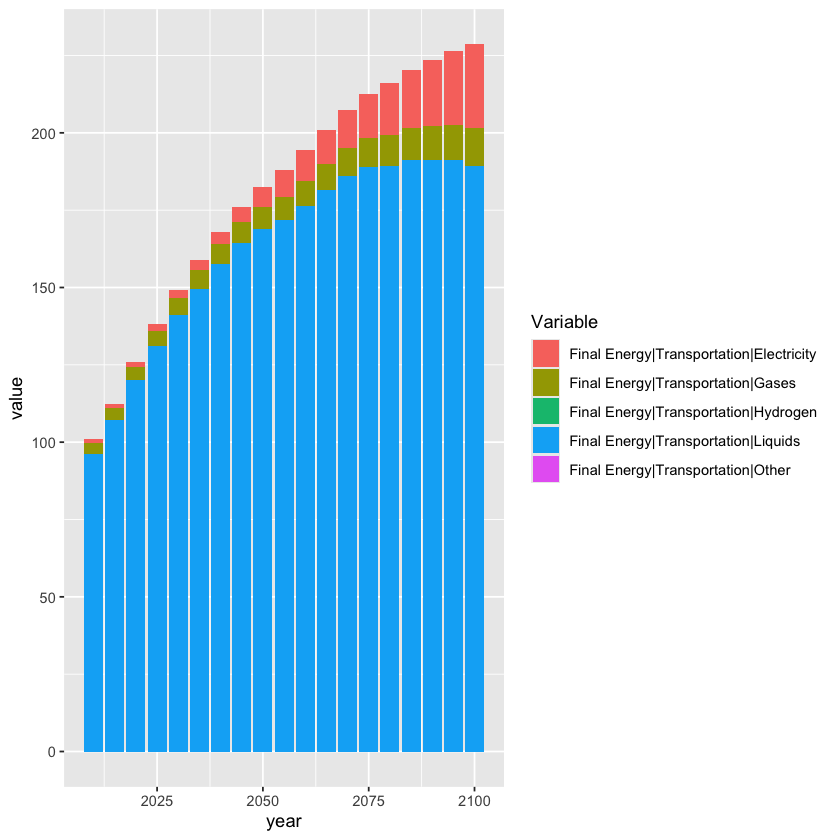

In [14]:
ggplot(input2[grep("Final Energy\\|Transportation\\|[^|]+$", input2$Variable),], aes(year, value, fill=Variable)) + geom_col()

# A common baseline

In [15]:
co2 = subset(input2, Variable == 'Diagnostics|MAGICC6|Concentration|CO2')

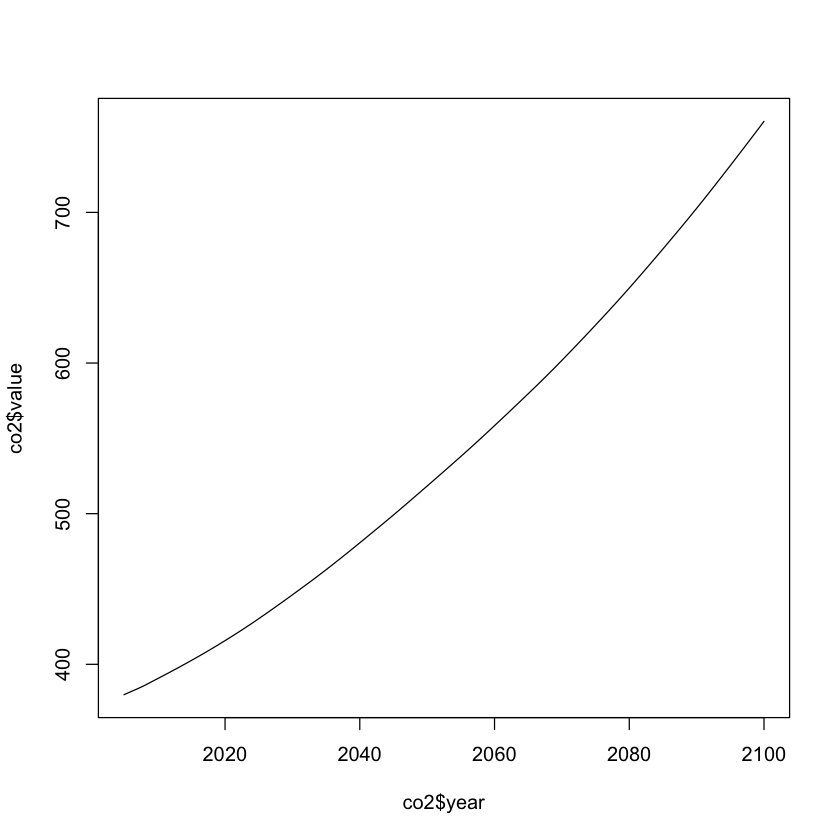

In [16]:
plot(co2$year, co2$value, type='l')

Let's get a common version of our final model from Lab 3, modified to use this new data.

In [17]:
head(co2)

,Model,Scenario,Region,Variable,Unit,variable,value,year
,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>
1301,AIM/CGE V2.2,EN_NPi2100,World,Diagnostics|MAGICC6|Concentration|CO2,ppm,X2005,379.8500,2005
1552,AIM/CGE V2.2,EN_NPi2100,World,Diagnostics|MAGICC6|Concentration|CO2,ppm,X2006,381.8050,2006
1803,AIM/CGE V2.2,EN_NPi2100,World,Diagnostics|MAGICC6|Concentration|CO2,ppm,X2007,383.7500,2007
2054,AIM/CGE V2.2,EN_NPi2100,World,Diagnostics|MAGICC6|Concentration|CO2,ppm,X2008,385.8500,2008
2305,AIM/CGE V2.2,EN_NPi2100,World,Diagnostics|MAGICC6|Concentration|CO2,ppm,X2009,388.1892,2009
2556,AIM/CGE V2.2,EN_NPi2100,World,Diagnostics|MAGICC6|Concentration|CO2,ppm,X2010,390.5047,2010


In [18]:
## Parameters
RR = 3.8 # Forcing at 2x CO2
C0 = 280 # Pre-industrial CO2
c = 0.098 # reaction rate of atmosphere
ECS = 3 # Equilibrium climate sensitivity
alpha = 1.0038 # Damage function scale
c.1960 = 3585.427 # GDP p.c. in 1960
c.2020 = 10542.301 # GDP p.c. in 2020
eta = 1.45 # Elasticity of marginal consumption

co2 = subset(input2, Variable == 'Diagnostics|MAGICC6|Concentration|CO2')

## Set up the initial values: T_2009 = 1 C.
df = data.frame(year=2009, T=1, D=NA, cbar=NA, u=NA)
## Loop over all years from 2009 to 2100
for (tt in 2010:2100) {
  ## Retrieve the CO2 concentration in year tt
  C1 = co2$value[co2$year == tt]
  ## Calculate the radiative foring
  F = (RR / log(2)) * log(C1 / C0)
  ## Update the warming level, using the last row of df for the previous year
  T = df$T[nrow(df)] + c * (F - (RR / ECS) * df$T[nrow(df)])
  ## Compute the damages
  D = alpha * T^2
  ## Compute social welfare
  cbar = (c.2020 - c.1960) * (tt - 1960) / (2020 - 1960) + c.1960
  cc = cbar * (1 - D / 100)
  uu = (cc^(1 - eta)) / (1 - eta)
  ## Add on the results for the new year to df
  df = rbind(df, data.frame(year=tt, T=T, D=D, cbar, u=uu))
}

In [19]:
tail(df)

,year,T,D,cbar,u
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
87,2095,3.914251,15.37958,19238.39,-0.02828445
88,2096,3.948259,15.64798,19354.34,-0.02824843
89,2097,3.982286,15.91886,19470.29,-0.02821341
90,2098,4.016306,16.19201,19586.24,-0.02817936
91,2099,4.050314,16.46738,19702.19,-0.02814626
92,2100,4.084326,16.74511,19818.13,-0.02811414


 - Find the CO2 concentration variable in our baseline dataset.
 - Incorporate that into the loop.
 - What does the resulting temperature look like?

# Kaya identity emissions

We are going to use our simplified model of emissions, the Kaya identity.

 - Collect the Population, GDP, Primary Energy, and CO2 Emissions variables
 - Construct energy intensity and emissions intensity
 - Show that we can recover total CO2 emissions from Kaya product

In [20]:
pop = subset(input2, Variable == "Population")
gdp = subset(input2, Variable == "GDP|PPP")
energy = subset(input2, Variable == "Primary Energy")
emit = subset(input2, Variable == "Emissions|CO2")

In [24]:
head(emit)

,Model,Scenario,Region,Variable,Unit,variable,value,year,energyintense
,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
2605,AIM/CGE V2.2,EN_NPi2100,World,Emissions|CO2,Mt CO2/yr,X2010,36092.88,2010,0.006001733
3860,AIM/CGE V2.2,EN_NPi2100,World,Emissions|CO2,Mt CO2/yr,X2015,38301.28,2015,0.005448273
5115,AIM/CGE V2.2,EN_NPi2100,World,Emissions|CO2,Mt CO2/yr,X2020,42049.68,2020,0.004751020
6370,AIM/CGE V2.2,EN_NPi2100,World,Emissions|CO2,Mt CO2/yr,X2025,45370.71,2025,0.004187424
7625,AIM/CGE V2.2,EN_NPi2100,World,Emissions|CO2,Mt CO2/yr,X2030,48085.64,2030,0.003752936
8880,AIM/CGE V2.2,EN_NPi2100,World,Emissions|CO2,Mt CO2/yr,X2035,50571.59,2035,0.003419975


In [22]:
emit$energyintense = energy$value / gdp$value

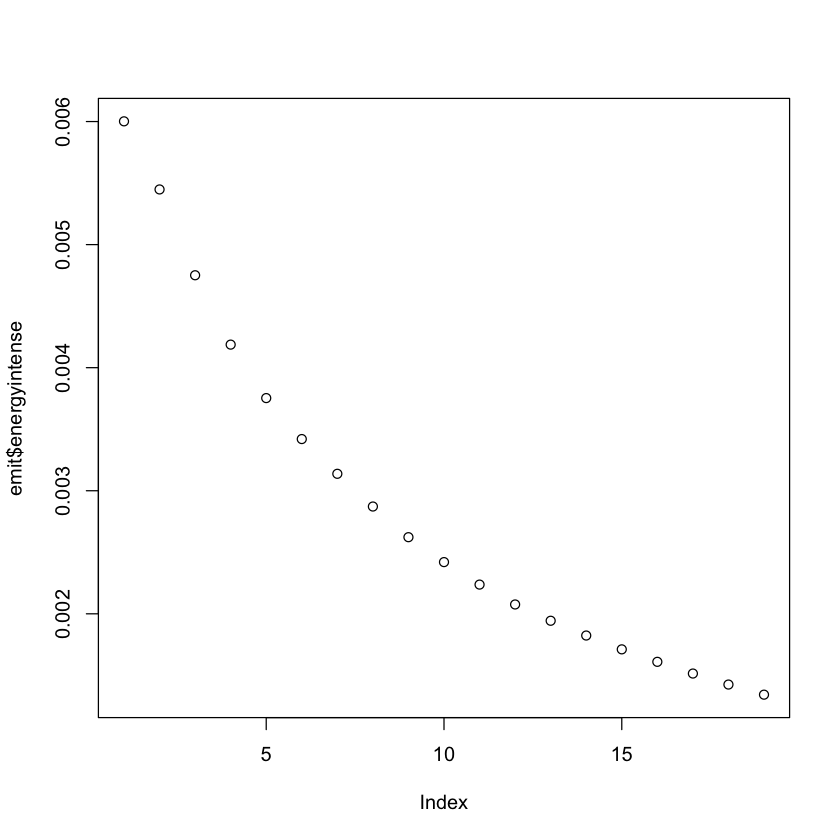

In [23]:
plot(emit$energyintense)

In [25]:
emit$carbonintensity = emit$value / energy$value

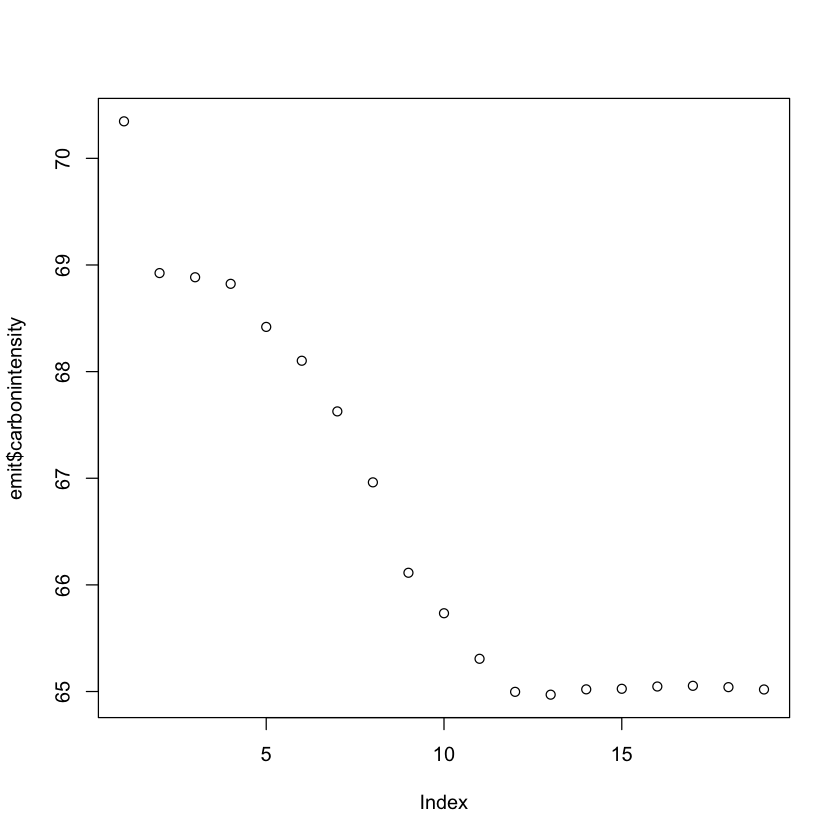

In [26]:
plot(emit$carbonintensity)

In [28]:
emit$gdppc = gdp$value / pop$value


In [33]:
emit$kaya = pop$value * emit$gdppc * emit$energyintense * emit$carbonintensity

In [34]:
head(emit)

,Model,Scenario,Region,Variable,Unit,variable,value,year,energyintense,carbonintensity,gdppc,kaya
,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2605,AIM/CGE V2.2,EN_NPi2100,World,Emissions|CO2,Mt CO2/yr,X2010,36092.88,2010,0.006001733,70.34706,12.40366,36092.88
3860,AIM/CGE V2.2,EN_NPi2100,World,Emissions|CO2,Mt CO2/yr,X2015,38301.28,2015,0.005448273,68.92413,13.97422,38301.28
5115,AIM/CGE V2.2,EN_NPi2100,World,Emissions|CO2,Mt CO2/yr,X2020,42049.68,2020,0.004751020,68.88480,16.76684,42049.68
6370,AIM/CGE V2.2,EN_NPi2100,World,Emissions|CO2,Mt CO2/yr,X2025,45370.71,2025,0.004187424,68.82333,19.67674,45370.71
7625,AIM/CGE V2.2,EN_NPi2100,World,Emissions|CO2,Mt CO2/yr,X2030,48085.64,2030,0.003752936,68.41926,22.54490,48085.64
8880,AIM/CGE V2.2,EN_NPi2100,World,Emissions|CO2,Mt CO2/yr,X2035,50571.59,2035,0.003419975,68.10200,25.30627,50571.59


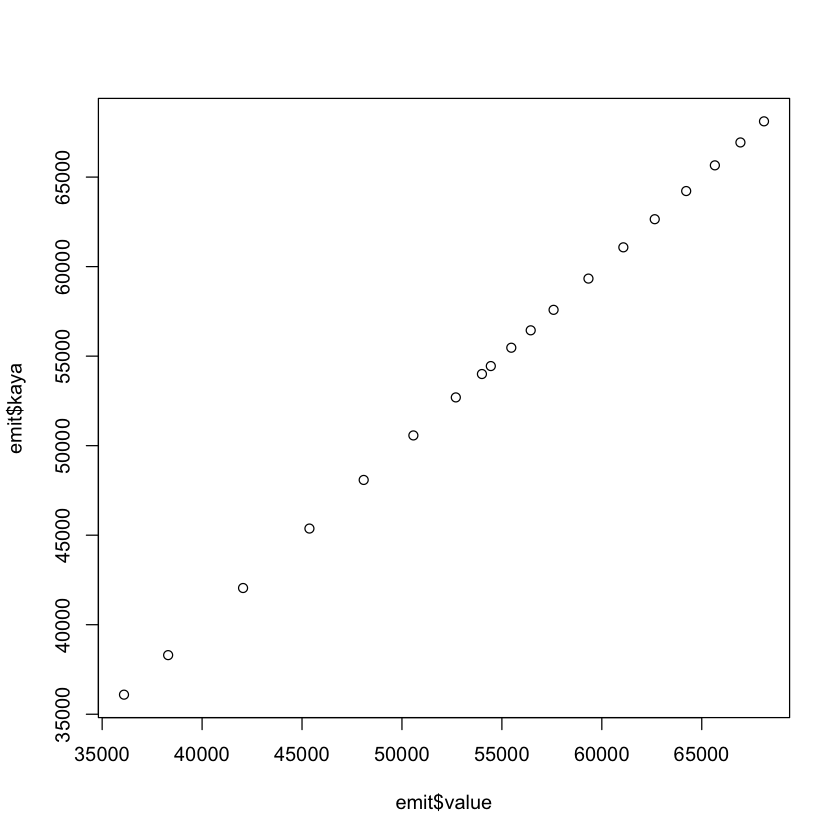

In [35]:
plot(emit$value, emit$kaya)

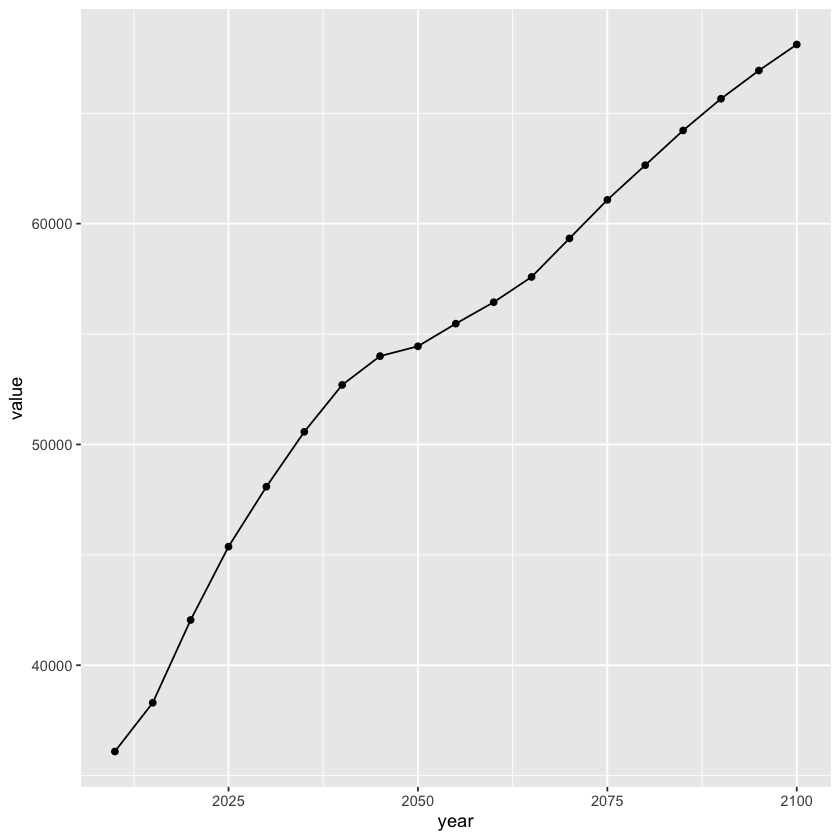

In [39]:
ggplot(emit, aes(year, value)) + geom_point() + geom_line(aes(y=kaya))

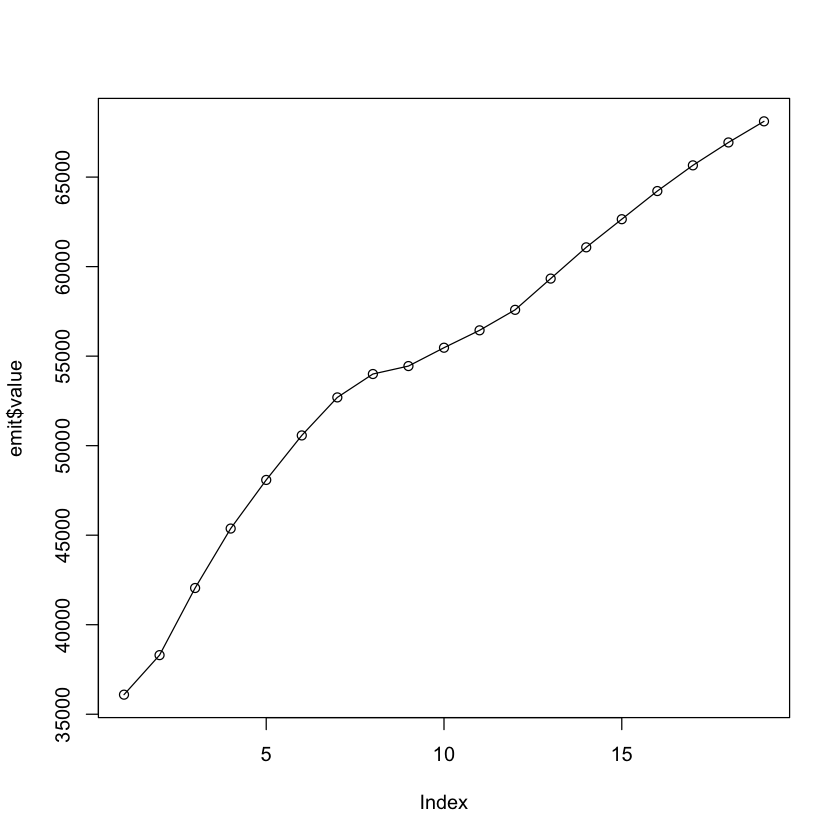

In [41]:
plot(emit$value)
lines(emit$kaya)

In [37]:
round(emit$value) == round(emit$kaya)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE

Simplify this to carbon-intensity of GDP (rather than of energy).

In [42]:
emit$cigdp = emit$value / gdp$value

 - Instead, construct emissions intensity of GDP
 - Show that this gives us the same result

We need annual values. Let's interpolate!

In [48]:
head(future)

,year,pop,gdppc,cigdp
,<int>,<dbl>,<dbl>,<dbl>
1,2010,6892.060,12.40366,0.4222043
2,2011,6973.422,12.71777,0.4128669
3,2012,7054.784,13.03188,0.4035296
4,2013,7136.146,13.34599,0.3941922
5,2014,7217.508,13.66011,0.3848548
6,2015,7298.871,13.97422,0.3755175


We can use a simple OLS model to find the conversion from emissions to ppm.

$$ppm_t = \alpha + \beta \sum_{s \le t} emit_t + \epsilon_t$$

In [49]:
yy = co2$value[co2$year >= 2010 & co2$year <= 2100]
xx = cumsum(future$pop * future$gdppc * future$cigdp)

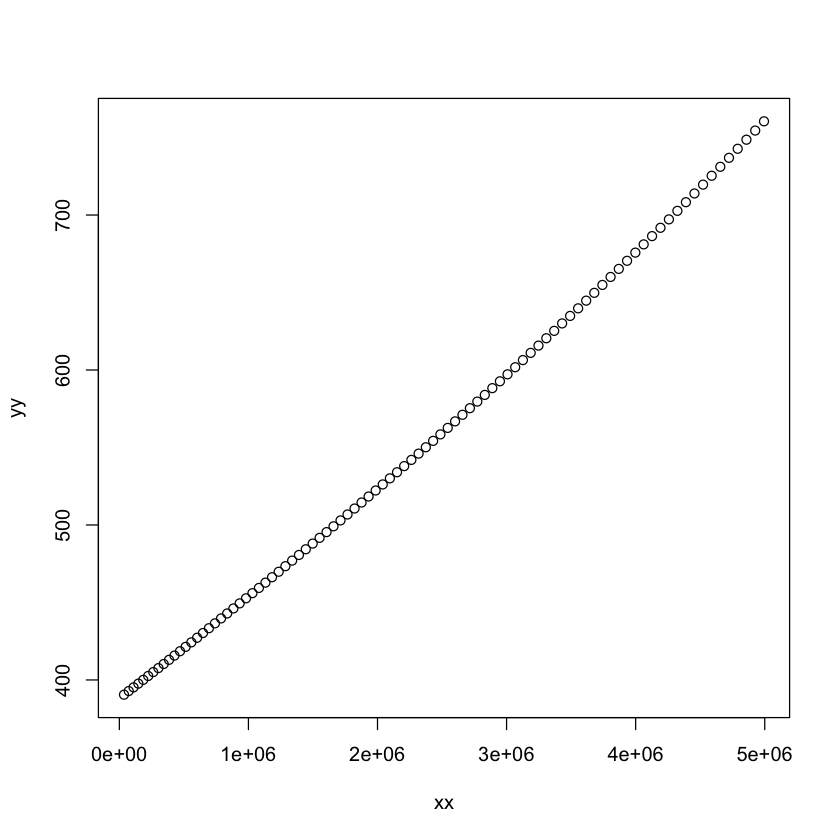

In [50]:
plot(xx, yy)

In [51]:
summary(lm(yy ~ xx))


Call:
lm(formula = yy ~ xx)

Residuals:
   Min     1Q Median     3Q    Max 
-5.232 -4.155 -1.055  3.440 11.629 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.800e+02  9.084e-01   418.3   <2e-16 ***
xx          7.385e-05  3.333e-07   221.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.65 on 89 degrees of freedom
Multiple R-squared:  0.9982,	Adjusted R-squared:  0.9982 
F-statistic: 4.911e+04 on 1 and 89 DF,  p-value: < 2.2e-16


 - Incorporate this into the code
 - What does the temperature trajectory look like now?
 - What happens if I stop emissions today?

In [ ]:
## Parameters
RR = 3.8 # Forcing at 2x CO2
C0 = 280 # Pre-industrial CO2
c = 0.098 # reaction rate of atmosphere
ECS = 3 # Equilibrium climate sensitivity
alpha = 1.0038 # Damage function scale
c.1960 = 3585.427 # GDP p.c. in 1960
c.2020 = 10542.301 # GDP p.c. in 2020
eta = 1.45 # Elasticity of marginal consumption

co2 = subset(input2, Variable == 'Diagnostics|MAGICC6|Concentration|CO2')

## Set up the initial values: T_2009 = 1 C.
df = data.frame(year=2009, T=1, D=NA, cbar=NA, u=NA)
## Loop over all years from 2009 to 2100
for (tt in 2010:2100) {
  ## Retrieve the CO2 concentration in year tt
  C1 = co2$value[co2$year == tt]
  ## Calculate the radiative foring
  F = (RR / log(2)) * log(C1 / C0)
  ## Update the warming level, using the last row of df for the previous year
  T = df$T[nrow(df)] + c * (F - (RR / ECS) * df$T[nrow(df)])
  ## Compute the damages
  D = alpha * T^2
  ## Compute social welfare
  cbar = (c.2020 - c.1960) * (tt - 1960) / (2020 - 1960) + c.1960
  cc = cbar * (1 - D / 100)
  uu = (cc^(1 - eta)) / (1 - eta)
  ## Add on the results for the new year to df
  df = rbind(df, data.frame(year=tt, T=T, D=D, cbar, u=uu))
}

# Mitigation costs

We need an estimate of global mitigation costs. For this, we will use our second file. Download it from here:
https://www.dropbox.com/scl/fi/xxdltbl9diuqa0hylgy6d/allmodels3-long.csv?rlkey=wt5o39nl2pzw4v0pb9kn6cc06&dl=0

In [ ]:
mitdf = read.csv("~/Dropbox/Climate Change Economics 2024/labs/lab5 - integrated assessment/allmodels3-long.csv")

Let's use regression to infer how carbon price reduces emissions and also reduces consumption.

We assume that every model and scenario has a different underlying growth rate of emissions and consumption.

In [ ]:
# Construct a name for each baseline
mitdf$run = paste(mitdf$Model, mitdf$Scenario)

In [ ]:
summary(lm(log(Consumption) ~ factor(Year) + run + log(Price.Carbon), data=subset(mitdf, Price.Carbon > 0)))

In [ ]:
logp2logcons = ???

In [ ]:
summary(lm(log(Emissions.CO2) ~ factor(Year) + run + log(Consumption) + Price.Carbon, data=mitdf))

In [ ]:
p2logemit = ???

 - Define a reduction path as a linear growth of carbon price.

In [ ]:
policy = data.frame(tt=2010:2100)
policy$price = ???

In [ ]:
plot(policy$tt, policy$price)

In [ ]:
policy$emitred = exp(p2logemit * policy$price)
policy$consloss = exp(logp2logcons * log(policy$price))

 - Multiply Kaya identity values by emissions reduction.

Now add on abatement costs.

 - Calculate consumption reduction
 - Calculate total consumption as baseline * (1 - damage) * consuption reduction

Now we want to optimize this, as a function of the rate of carbon price increase.

In [ ]:
simulate = function(rate) {
    [Your whole loop.]
    
    df
}

In [ ]:
df = simulate(1)

In [ ]:
plot(df$year, df$consleft)

In [ ]:
df1 = simulate(1)
df2 = simulate(10)

In [ ]:
plot(df1$year, df1$u)
lines(df2$year, df2$u)

In [ ]:
plot(df1$year, df1$D + 100 * (1 - df1$consleft))
lines(df2$year, df2$D + 100 * (1 - df2$consleft))

Now let's construct the net present value of utility.

In [ ]:
rho = 1.5 / 100
year0 = 2020

npv = function(rate) {
    df = simulate(rate)
    
    ???
}

In [ ]:
plot(1:100, sapply(1:100, npv))

In [ ]:
optimize(npv, c(0, 50), maximum=TRUE)

In [ ]:
df = simulate(???)

In [ ]:
plot(df$year, df$T)

In [ ]:
plot(df$year, df$consleft)

In [ ]:
plot(df$year, df$D)